In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy import stats
import matplotlib.ticker

#CLIENTLIST = np.sort([int (i) for i in listdir("/Users/ettorepuccetti/Desktop/stored_log/multi/") if not i.startswith('.')])
CLIENTLIST = [1,2,4,8,16,32,64]
#CLIENTLIST = range(1,17)

## Clients Throughput

In [22]:
def avgExcludingWarmUp(log):
    return (np.mean(log[4:-2,1]))

In [23]:
# taking the SECOND LAST line of each file, where I have the THROUGHPUT of all experiment, and I mean them.
def aggregateSingleExperimentThroughput(nclient, mode):
    path = "stored_log/"+mode+"/"+str(nclient)+"/interval/"
    list_files = [path+file for file in listdir(path) if not file.startswith('.')]
    performanceAggr = []
    for file in list_files:
        log = pd.read_csv(file, header=None).values
        performance = avgExcludingWarmUp(log)
        performanceAggr =  np.append(performanceAggr, performance)
    
    error = np.std(performanceAggr) if len(performanceAggr)>1 else 0
    return [np.sum(performanceAggr),error]
    

In [24]:
def aggregateAllExperimentsThroughput(mode):
    aggregate = [[],[]]
    for i in (CLIENTLIST):
        single = aggregateSingleExperimentThroughput(i,mode)
        aggregate[0] = np.append(aggregate[0],single[0])
        aggregate[1] = np.append(aggregate[1],single[1])
    
    return (aggregate)

In [25]:
def printAggr (avgAggr, stdAggr, label, marker):
    if (not 5 in CLIENTLIST):
        plt.xscale("log",basex=2)
    plt.plot(CLIENTLIST,avgAggr, linewidth=3.0, label=label, marker=marker, markersize=12)
    plt.fill_between(CLIENTLIST, avgAggr + stdAggr/2, avgAggr - stdAggr/2, alpha=0.3)

In [26]:
import matplotlib.ticker
def printThePlotThroughput():
    [avgSkeleton, stdSkeleton] = aggregateAllExperimentsThroughput("skeleton")
    [avgMulti, stdMulti] = aggregateAllExperimentsThroughput("multi")
    [avgTag, stdTag] = aggregateAllExperimentsThroughput("tag")
    plt.figure(figsize=(12,8))
    plt.grid()
    printAggr(avgMulti, stdMulti, "Multithread [8 thr.]","o")
    printAggr(avgTag, stdTag, "Tag Cleaning","^")
    printAggr(avgSkeleton, stdSkeleton, "Skeleton","s")
    plt.xticks(CLIENTLIST, size=15)
    plt.yticks(size=15)
    
    xmajorLocator = matplotlib.ticker.FixedLocator(locs=CLIENTLIST) 
    xmajorFormatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_locator( xmajorLocator )
    plt.gca().xaxis.set_major_formatter( xmajorFormatter )
    plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    plt.ylabel("Throughput [ops/s]", size = 15)
    plt.xlabel("Number of clients", size = 15)
    plt.title("Throughput vs number of clients", size = 15)
    plt.legend(loc="upper left", fontsize = 15)
    plt.show()

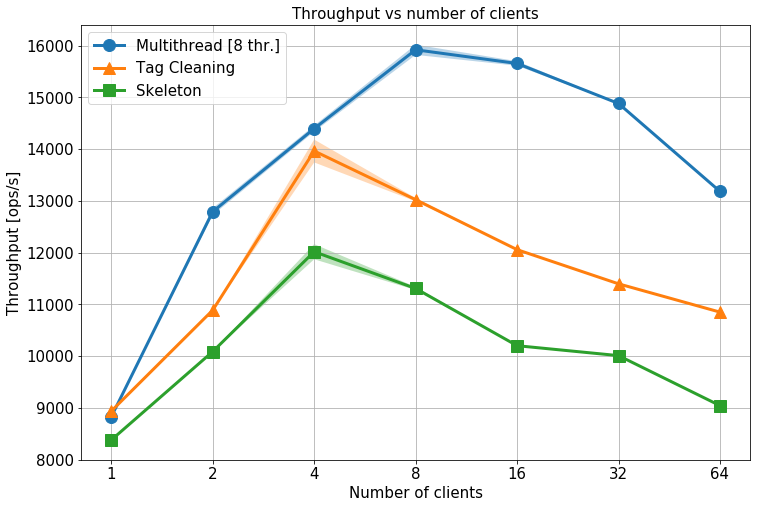

In [27]:
printThePlotThroughput()

## Clients Response Time

In [15]:
# taking the LAST line of each file, where I have the RESPONSE TIME of all experiment, and I mean them.

def aggregateSingleExperimentResponseTime(nclient, mode):
    path = "/Users/ettorepuccetti/Desktop/stored_log/"+mode+"/"+str(nclient)+"/interval/"
    list_files = [path+file for file in listdir(path) if not file.startswith('.')]
    performanceAggr = []
    for file in list_files:
        log = pd.read_csv(file, header=None).values
        performance = log[-1,0]
        performanceAggr =  np.append(performanceAggr, performance)
    
    error = np.std(performanceAggr) if len(performanceAggr)>1 else 0
    return [np.mean(performanceAggr),error]

In [16]:
def aggregateAllExperimentsResponse(mode):
    aggregate = [[],[]]
    for i in (CLIENTLIST):
        single = aggregateSingleExperimentResponseTime(i,mode)
        aggregate[0] = np.append(aggregate[0],single[0])
        aggregate[1] = np.append(aggregate[1],single[1])
    
    return (aggregate)

In [19]:


def printThePlotResponse():
    [avgSkeleton, stdSkeleton] = aggregateAllExperimentsResponse("skeleton")
    [avgMulti, stdMulti] = aggregateAllExperimentsResponse("multi")
    [avgTag, stdTag] = aggregateAllExperimentsResponse("tag")
    plt.figure(figsize=(12,8))
    plt.grid()
    if (not 5 in CLIENTLIST):
        plt.xscale("log",basex=2)
    labMulti, = plt.plot(CLIENTLIST,avgMulti, linewidth=3.0, label="Multithread [8 thr.]", marker="o", markersize=12)
    labTag, = plt.plot(CLIENTLIST,avgTag, linewidth=3.0, label="Tag Cleaning", marker="^", markersize=12)
    labSkeleton, = plt.plot(CLIENTLIST,avgSkeleton, linewidth=3.0, label="Skeleton", marker="s", markersize=12)
    plt.xticks(CLIENTLIST, size=15)
    plt.yticks(size=15)
    
    xmajorLocator = matplotlib.ticker.FixedLocator(locs=CLIENTLIST) 
    xmajorFormatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_locator( xmajorLocator )
    plt.gca().xaxis.set_major_formatter( xmajorFormatter )
    plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


    plt.ylabel("Response time [ms]", size = 15)
    plt.xlabel("Number of clients", size = 15)
    plt.title("Response time vs number of clients", size = 15)
    plt.legend(loc="upper left", fontsize = 15, handles=[labSkeleton,labTag,labMulti])
    plt.show()

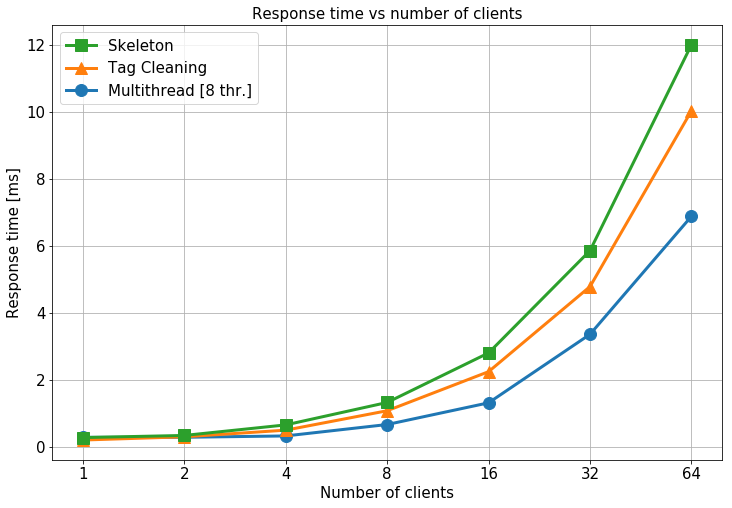

In [28]:
printThePlotResponse()